In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Loading the Train.CSV file

In [2]:
df = pd.read_csv('Pulsar_datasets/Train.csv')
df.head()

,Mean_Profile,SD_Profile,Excess_kurtosis_Profile,Skewness_Profile,Mean_Curve,SD_Curve,Excess_kurtosis_curve,Skewness_curve,Pulsar
0,139.937500,53.439035,-0.039384,-0.284501,2.052676,15.381810,10.683568,138.329152,0
1,139.625000,49.633973,-0.184105,-0.015896,0.939799,10.092949,17.078812,367.454955,0
2,106.648438,55.669587,0.377442,-0.594865,1.557692,14.090161,12.268356,171.990291,0
3,83.015625,38.095272,0.514061,2.177837,1.945652,16.407373,9.732946,104.435977,0
4,116.468750,35.632222,0.386352,2.199301,1.541806,14.173109,12.022914,164.296414,0


### Splitting Dataset into Training and Test set

In [3]:
X = df.loc[:, df.columns != 'Pulsar']
y = df.loc[:, df.columns == 'Pulsar']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Implementing the model

In [4]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.072521
         Iterations 10
                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.765    
Dependent Variable:     Pulsar             AIC:                1833.0976
Date:                   2019-03-10 20:07   BIC:                1892.5833
No. Observations:       12528              Log-Likelihood:     -908.55  
Df Model:               7                  LL-Null:            -3864.8  
Df Residuals:           12520              LLR p-value:        0.0000   
Converged:              1.0000             Scale:              1.0000   
No. Iterations:         10.0000                                         
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Mean_Profile            -0.0066   0.0060  -1.1029 

> #### The p-values for most of the variables are smaller than 0.05, except two variables(Mean_Profile and SD_Curve), therefore, we will remove them.

In [5]:
cols1=['SD_Profile', 'Excess_kurtosis_Profile', 'Skewness_Profile', 'Mean_Curve', 'Excess_kurtosis_curve', 'Skewness_curve'] 
X=X_train[cols1]
y=y_train['Pulsar']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.073649
         Iterations 10
                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.760    
Dependent Variable:     Pulsar             AIC:                1303.6569
Date:                   2019-03-10 20:07   BIC:                1346.1308
No. Observations:       8769               Log-Likelihood:     -645.83  
Df Model:               5                  LL-Null:            -2696.2  
Df Residuals:           8763               LLR p-value:        0.0000   
Converged:              1.0000             Scale:              1.0000   
No. Iterations:         10.0000                                         
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
SD_Profile              -0.0524   0.0081  -6.5015 

### Logistic Regression Model Fitting

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Predicting the test set results

In [7]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Calculating the accuracy

In [8]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


### Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2357   16]
 [  31  227]]


> #### The result is telling us that we have 2357+227 correct predictions and 31+16 incorrect predictions.

### Compute precision, recall, F-measure and support

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2373
           1       0.93      0.88      0.91       258

   micro avg       0.98      0.98      0.98      2631
   macro avg       0.96      0.94      0.95      2631
weighted avg       0.98      0.98      0.98      2631



### ROC Curve

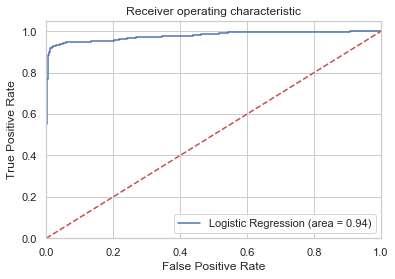

In [11]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

> #### The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

## Predicting output for the Test.CSV

### Loading the Test.CSV file

In [12]:
df1 = pd.read_csv('Pulsar_datasets/Test.csv')
df1.head()

,Mean_Profile,SD_Profile,Excess_kurtosis_Profile,Skewness_Profile,Mean_Curve,SD_Curve,Excess_kurtosis_curve,Skewness_curve
0,114.531250,43.977078,0.348897,0.962387,1.548495,13.955201,10.927910,140.540754
1,108.617188,45.805656,0.500210,0.328802,2.734950,20.424979,8.552659,78.183891
2,105.546875,41.360998,0.219053,0.555135,2.469900,14.960704,9.051707,103.517934
3,94.507812,33.818910,0.401374,3.052846,2.749164,21.541023,8.608826,78.096962
4,122.562500,45.473679,0.062036,0.417907,2.964047,21.711191,8.214987,71.957368


### Drop the redundant columns identified earlier

In [13]:
X1 = df1.drop(columns=['Mean_Profile', 'SD_Curve'])
X1.head()

,SD_Profile,Excess_kurtosis_Profile,Skewness_Profile,Mean_Curve,Excess_kurtosis_curve,Skewness_curve
0,43.977078,0.348897,0.962387,1.548495,10.927910,140.540754
1,45.805656,0.500210,0.328802,2.734950,8.552659,78.183891
2,41.360998,0.219053,0.555135,2.469900,9.051707,103.517934
3,33.818910,0.401374,3.052846,2.749164,8.608826,78.096962
4,45.473679,0.062036,0.417907,2.964047,8.214987,71.957368


### Predicting the test results

In [14]:
y1_pred = logreg.predict(X1)
y1_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Saving the predicted results into a Predictions.CSV file

In [15]:
# Convert y1_pred array to pandas data frame
y1_pred_df = pd.DataFrame(y1_pred)

# Make the index in y1_pred_df start from 1 instead of 0
y1_pred_df.index += 1

# Save the y1_pred_df as a csv file
y1_pred_df.to_csv("Predictions.csv", header=['Predictions'], index_label='Id')

In [2]:
df1 = pd.read_csv('True_Values.csv')
df1.head()

,Id,True
0,4073,0
1,12340,0
2,8812,0
3,10939,0
4,5029,0


In [3]:
df2 = pd.read_csv('Predictions.csv')
df2.head()

,Id,Predictions
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [6]:
y1_test = df1.as_matrix(columns = df1.columns[1:])
y1_test

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [ ]:
y1_pred = 

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y1_pred)
print(confusion_matrix)